In [1]:
import sys
import os
import cv2
import copy
import gmpy2 as gp
import numpy as np
import matplotlib.pyplot as plt

from math import sqrt, log, floor

In [2]:
print(cv2.__version__)

3.4.2


In [3]:
lena_img = cv2.imread('./InputImages/lena.png', cv2.IMREAD_GRAYSCALE)
lena_img = cv2.resize(lena_img,(64, 64), interpolation = cv2.INTER_CUBIC)
print(lena_img)

[[169 164 164 ... 135 129 179]
 [166 164 162 ... 141 120  57]
 [165 166 165 ... 110  62  57]
 ...
 [ 75 103 176 ... 106  75  73]
 [ 69  77 192 ...  94  71  61]
 [ 59  62 195 ...  62  66 104]]


In [176]:
lena_img=lena_img/1.0
lena_img.shape

(64, 64)

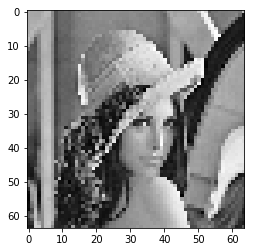

In [177]:
plt.imshow(lena_img, cmap="gray")
plt.show()

In [178]:
print(lena_img.shape)
print(lena_img.dtype)

(64, 64)
float64


In [179]:
max = 255
min = 0
n_range = 10

#length of range
lor = (max - min + 1) / n_range

shades_gray = []

for i in range(1, n_range + 1):
        l1 = []
        start = lor * (i - 1) + min
        end = start + lor - 1
        l1.append(int(start))
        l1.append(int(end + 1))
        shades_gray.append(l1)
shades_gray[9][1]=258

print(shades_gray)

[[0, 25], [25, 51], [51, 76], [76, 102], [102, 128], [128, 153], [153, 179], [179, 204], [204, 230], [230, 258]]


In [180]:
fs_coeffs = [7.0,3.0,5.0,1.0]

In [181]:
class Dither:

    def __init__(self,pixels,xl,yl):

        self.pixels = pixels
        
        self.xl = xl
        self.yl = yl

        self.fs_dither()

    def _find_closest_palette_color(self, oldpixel): 
        # return int(oldpixel + 0.5)
        #if (255 - oldpixel) < oldpixel:
         #   return 255
        #else:
         #   return 0
        for i in range(0, len(shades_gray)):
            if (oldpixel >= shades_gray[i][0]) and (oldpixel <= shades_gray[i][1]):
                return shades_gray[i][0]
        return 255

    def fs_dither(self):

        A,B,G,S = map(lambda x : float(x)/16.0, fs_coeffs)

        for y in range(0, self.yl):
            for x in range(0, self.xl):
                oldpixel = self.pixels[x][y]
                newpixel = self._find_closest_palette_color(oldpixel)
                self.pixels[x][y] = float(newpixel)
                quant_error = float(oldpixel - newpixel)
                if (x < self.xl - 1):
                    self.pixels[x+1][y] += (A * quant_error)
                if (x > 0) and (y < self.yl - 1):
                    self.pixels[x-1][y+1] += (B * quant_error)
                if (y < self.yl - 1):
                    self.pixels[x][y+1] += (G * quant_error)
                if (x < self.xl - 1) and (y < self.yl - 1):
                    self.pixels[x+1][y+1] += (S * quant_error) 

In [182]:
class ImgHelper:
    
    def __init__(self, pixels, xl, yl):
        
        self.pixels = pixels
        self.xl = xl
        self.yl = yl
        self.imgstr = ""
        
        self.imgtostr()
        
    def get_color_index(self, oldpixel):
        for i in range(0, len(shades_gray)):
            if oldpixel == shades_gray[i][0]:
                return i
        
        # Default case: We don't get here though!
        return 9
        
    def imgtostr(self):
        
        for y in range(0, self.yl):
            for x in range(0, self.xl):
                self.imgstr += str(self.get_color_index(self.pixels[x][y]))
                
    def get_str(self):
        return self.imgstr
    
def add_noise(img):
        
    r_noise = [-1, 1]
        
    (xl, yl) = img.shape
    for y in range(0, yl):
        for x in range(0, xl):
            oldpixel = img[x][y]
                
            noise_ind = np.random.randint(low=0, high=2)
            noise_val = r_noise[noise_ind] * oldpixel / 100
                
            img[x][y] = oldpixel + noise_val
    return img
                

In [183]:
(xl, yl) = lena_img.shape

In [184]:
l2 = copy.deepcopy(lena_img)

a = 1
b = 1
iters = floor(log(10) * xl * yl * 10)
for i in range(0, iters * 10):
    print("Iteration: " + str(i))
    l2_temp = copy.deepcopy(l2)

    D = Dither(l2_temp, xl, yl)
    I = ImgHelper(l2_temp, xl, yl)
    img_val = int(I.get_str())
    a = img_val
    # if a == b:
        # print("Trye")
    # else:
            # print("False")
    # print(img_val)
    if gp.is_prime(img_val):
        print("Wohoo!")
        break
    l2 = add_noise(l2)
    b = a
    
gp.is_prime(img_val)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
It

Iteration: 556
Iteration: 557
Iteration: 558
Iteration: 559
Iteration: 560
Iteration: 561
Iteration: 562
Iteration: 563
Iteration: 564
Iteration: 565
Iteration: 566
Iteration: 567
Iteration: 568
Iteration: 569
Iteration: 570
Iteration: 571
Iteration: 572
Iteration: 573
Iteration: 574
Iteration: 575
Iteration: 576
Iteration: 577
Iteration: 578
Iteration: 579
Iteration: 580
Iteration: 581
Iteration: 582
Iteration: 583
Iteration: 584
Iteration: 585
Iteration: 586
Iteration: 587
Iteration: 588
Iteration: 589
Iteration: 590
Iteration: 591
Iteration: 592
Iteration: 593
Iteration: 594
Iteration: 595
Iteration: 596
Iteration: 597
Iteration: 598
Iteration: 599
Iteration: 600
Iteration: 601
Iteration: 602
Iteration: 603
Iteration: 604
Iteration: 605
Iteration: 606
Iteration: 607
Iteration: 608
Iteration: 609
Iteration: 610
Iteration: 611
Iteration: 612
Iteration: 613
Iteration: 614
Iteration: 615
Iteration: 616
Iteration: 617
Iteration: 618
Iteration: 619
Iteration: 620
Iteration: 621
Iteration:

Iteration: 1096
Iteration: 1097
Iteration: 1098
Iteration: 1099
Iteration: 1100
Iteration: 1101
Iteration: 1102
Iteration: 1103
Iteration: 1104
Iteration: 1105
Iteration: 1106
Iteration: 1107
Iteration: 1108
Iteration: 1109
Iteration: 1110
Iteration: 1111
Iteration: 1112
Iteration: 1113
Iteration: 1114
Iteration: 1115
Iteration: 1116
Iteration: 1117
Iteration: 1118
Iteration: 1119
Iteration: 1120
Iteration: 1121
Iteration: 1122
Iteration: 1123
Iteration: 1124
Iteration: 1125
Iteration: 1126
Iteration: 1127
Iteration: 1128
Iteration: 1129
Iteration: 1130
Iteration: 1131
Iteration: 1132
Iteration: 1133
Iteration: 1134
Iteration: 1135
Iteration: 1136
Iteration: 1137
Iteration: 1138
Iteration: 1139
Iteration: 1140
Iteration: 1141
Iteration: 1142
Iteration: 1143
Iteration: 1144
Iteration: 1145
Iteration: 1146
Iteration: 1147
Iteration: 1148
Iteration: 1149
Iteration: 1150
Iteration: 1151
Iteration: 1152
Iteration: 1153
Iteration: 1154
Iteration: 1155
Iteration: 1156
Iteration: 1157
Iteratio

Iteration: 1610
Iteration: 1611
Iteration: 1612
Iteration: 1613
Iteration: 1614
Iteration: 1615
Iteration: 1616
Iteration: 1617
Iteration: 1618
Iteration: 1619
Iteration: 1620
Iteration: 1621
Iteration: 1622
Iteration: 1623
Iteration: 1624
Iteration: 1625
Iteration: 1626
Iteration: 1627
Iteration: 1628
Iteration: 1629
Iteration: 1630
Iteration: 1631
Iteration: 1632
Iteration: 1633
Iteration: 1634
Iteration: 1635
Iteration: 1636
Iteration: 1637
Iteration: 1638
Iteration: 1639
Iteration: 1640
Iteration: 1641
Iteration: 1642
Iteration: 1643
Iteration: 1644
Iteration: 1645
Iteration: 1646
Iteration: 1647
Iteration: 1648
Iteration: 1649
Iteration: 1650
Iteration: 1651
Iteration: 1652
Iteration: 1653
Iteration: 1654
Iteration: 1655
Iteration: 1656
Iteration: 1657
Iteration: 1658
Iteration: 1659
Iteration: 1660
Iteration: 1661
Iteration: 1662
Iteration: 1663
Iteration: 1664
Iteration: 1665
Iteration: 1666
Iteration: 1667
Iteration: 1668
Iteration: 1669
Iteration: 1670
Iteration: 1671
Iteratio

True

In [189]:
gp.is_prime(img_val)

True

In [185]:
l3 = copy.deepcopy(lena_img)

(xl, yl) = l3.shape
count = 0

for y in range(0, yl):
    for x in range(0, xl):
        l3[x][y] = shades_gray[int(str(img_val)[count])][0]
        count += 1

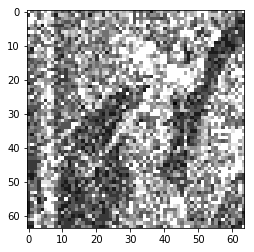

In [186]:
plt.imshow(l3, cmap="gray")
plt.show()

In [41]:
l2 = copy.deepcopy(lena_img)
l2_b = cv2.blur(l2, (5, 5))

In [42]:
D = Dither(l2_b, xl, yl)

In [43]:
I = ImgtoStr(l2_b, xl, yl)

In [44]:
img_val = int(I.get_str())

In [45]:
print(gp.is_prime(img_val))

False


In [15]:
cv2.imshow('image', lena_img)
cv2.waitKey(0)
cv2.destroyAllWindows()